**Load Libaries**

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from __future__ import division
from sklearn import linear_model

**Motivation**

*What nations are moving to CPH and how is the trend the last 20 years.*

**What is your dataset?**

*The raw dataset is from the [Open Copenhagen data](http://data.kk.dk/) and the data contains information about number of people in age group from different nation living in a specific district for each year from 1994 to 2015 in Copenhagen*
<ol>
   <p>**Variables in the dataset:** </p>
  <li>Aar(e. Year)</li>
  <li>Alder (e. Age)</li>
  <li>Bydel (e. District) </li>
  <li>Personer (e. Population) </li>
  <li>Statkode (e. Code for nation) </li>
</ol>

You can get the data set **[here](http://data.kk.dk/dataset/befolkningen-efter-ar-bydel-alder-og-statsborgerskab)**




**Why did you choose this/these particular dataset(s)?**

*We wanted to see which nations are moving to Copenhagen through the years to see if there is something that we could explain. Like when the finacial crisis happend alot of Icelandic people starting move to the nordic countries.*


**What was your goal for the end user's experience?**

In the end the user can look up any country of his preference and see if that particular nation has any trend through the years. Also, find some interesting example of nations moving to Copenhagen or nations moving from Copenhagen.





*Read in the raw data from open copenhagen data (http://data.kk.dk/dataset/befolkningen-efter-ar-bydel-alder-kon-og-civilstand) and taking out all of the Danes data as we are looking at foreign nation in CPH. Also, adding colum*

In [3]:
BefolkingKBH_Data = pd.read_csv('../Data/befkbhalderstatkode.csv')
BefolkingKBH_Data_noDanes = BefolkingKBH_Data[(BefolkingKBH_Data['STATKODE'] != 5100)].copy()

**Basic stats. Let's understand the dataset better**


**Write about your choices in data cleaning and preprocessing**

*We want to get the date set from the .csv file to a DataFrame and create three different DataFrame from the original DataFrame*

*The first DataFrame (Kbh_Stats_noDanes) contains the all of the nations from the .csv file expect the Danes (The foreigners).
The DataFrame contains the number of people from specific nation living in a specific district and the percentage of the specific nation divide by the total of every foreign nation living in the specific district*

Example: (Not true values!)

*Number of Icelandic people living in Østerbro the year 2015 was 100, however the total number of foreigners living in Østerbro was 1000. So, Icelandic people counted as 100/1000 = 0.1% of the foreigners living in Østerbro.*


<ol>
   <p>**Variables in the DataFrame (Kbh_Stats_noDanes) with the districts and without the danes:** </p>
  <li>Aar(e. Year)</li>
  <li>Statkode (e. Code for nation) </li>
  <li>BYDEL (e. District) </li> 
  <li>Total</li>
  <li>Percentage </li>
</ol>


*The second DataFrame containes the same information however, now we skip dividing into districts and just look at foreigners living in Copenhagen.*

Example: (Not true values!)

*Number of Icelandic people living in Copenhagen the year 2015 was 100 however the total number of foreigners living in Copenhagen was 1000. So, Icelandic people counted as 100/1000 = 0.1% of the foreigners living in Copenhagen.*

<ol>
   <p>**Variables in the DataFrame without danes and district:** </p>
  <li>Aar(e. Year)</li>
  <li>Statkode (e. Code for nation) </li>
  <li>Total</li>
  <li>Percentage </li>
</ol>


**Write a short section that discusses the dataset stats (here you can recycle the work you did for Project Assignment A)**

*The dataset stats contains now both the total number of foreign nation living either in Copenhagen or in more specific district in Copenahgen and also, the percentage. This will give us a good indications on how the trend for specific countries living in copenhagen.*


In [118]:
# Here we create a unique list of Country, District, Age and year
StatkodeList = BefolkingKBH_Data_noDanes.STATKODE.unique()
BydelList = BefolkingKBH_Data_noDanes.BYDEL.unique()
AlderList = BefolkingKBH_Data_noDanes.ALDER.unique()

*Looping through the data and calculating the number of Danes each year in a specific district and also sum all upp all other nations. Also, finding the ration between Danes and foreign nation.*

In [135]:
# Here we process a dataset with the danes!
Data_Array = np.array([]).reshape(0,5) # Create a numpy array
for val,Year in enumerate(AarList):
    for val3,District in enumerate(BydelList):
        Total_Dane = sum((BefolkingKBH_Data[((BefolkingKBH_Data['AAR'] == Year)  
                                        & (BefolkingKBH_Data['BYDEL'] == District)  
                                       & (BefolkingKBH_Data['STATKODE'] == 5100) )])['PERSONER'])
        
        Total_Other = sum((BefolkingKBH_Data[((BefolkingKBH_Data['AAR'] == Year) 
                                                & ( (BefolkingKBH_Data['STATKODE'] is not 5100) ) 
                                                & ( (BefolkingKBH_Data['BYDEL'] == District) ) )])['PERSONER'])
        data = Total_Dane/(Total_Other+Total_Dane)
        Data_Array = np.append(Data_Array,[[Year,5100,District,Total_Dane,data]],axis = 0)
        Data_Array = np.append(Data_Array,[[Year,0,District,Total_Other,1-data]],axis = 0)
            
# Create a dataframe from the numpy array and sort based on year, country number and district. 
Kbh_Stats = pd.DataFrame(Data_Array, columns = ['AAR', 'STATKODE', 'BYDEL','Total','Percentage'])
Kbh_Stats = Kbh_Stats.sort_values(['AAR', 'STATKODE', 'BYDEL'], ascending = [1,1,1])

*Looping through the data without Danes and calculated the percentage of each nation for each year. Takes along time to run and prints out the year to see the status of the process*

In [5]:
Data_Array_noDanes = np.array([]).reshape(0,5) # Create a empty numpy array
for val,Year in enumerate(AarList):
    print Year # Print out the year.. acts like a load bar to see how much of the process is left.
    for val2,CountryNR in enumerate(StatkodeList):
        for val3,District in enumerate(BydelList):
            #Get the total number of foreigners living in specific district
            Total = sum((BefolkingKBH_Data_noDanes[((BefolkingKBH_Data_noDanes['AAR'] == Year)  
                                                    & ( (BefolkingKBH_Data_noDanes['BYDEL'] == District) ) )])['PERSONER'])
            #Get the total number of specific foreigners living in specific district
            Total_Country = sum((BefolkingKBH_Data_noDanes[((BefolkingKBH_Data_noDanes['AAR'] == Year) 
                                                            & ( (BefolkingKBH_Data_noDanes['STATKODE'] == CountryNR) ) 
                                                            & ( (BefolkingKBH_Data_noDanes['BYDEL'] == District) ) )])['PERSONER'])
            if Total == 0:
                data = 0.0
            else :
                data = Total_Country/Total # Calc the percentage
            Data_Array_noDanes = np.append(Data_Array_noDanes,[[Year,CountryNR,District,Total_Country,data]],axis = 0)

2015
2014
2013
2012
2011
2010
2009
2008
2007
2006
2005
2004
2003
2002
2001
2000
1999
1998
1997
1996
1995
1994
1993
1992


In [46]:
# Transforming the numpy array to DataFrame and sort based on year, country number and district.
Kbh_Stats_noDanes = pd.DataFrame(Data_Array_noDanes, columns = ['AAR', 'STATKODE', 'BYDEL','Total','Percentage'])
Kbh_Stats_noDanes = Kbh_Stats_noDanes.sort_values(['AAR', 'STATKODE', 'BYDEL'], ascending = [1,1,1])

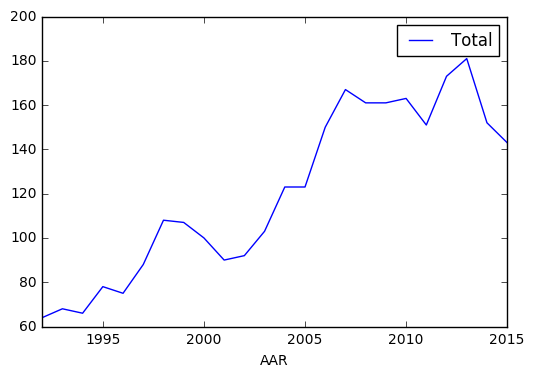

In [47]:
# Now just little bit visualizing of the data. Plot of the Icelandic people living in Indry By in CPH through the years
Kbh_Stats_noDanes[((Kbh_Stats_noDanes['STATKODE'] == 5106) & (Kbh_Stats_noDanes['BYDEL'] == 1))].plot(x = 'AAR', y = 'Total')
plt.show()

In [11]:
Data_noDanes_Allcph = np.array([]).reshape(0,4) # Create a empty numpy array
for val,Year in enumerate(AarList):
    print Year # Print out the year.. acts like a load bar to see how much of the process is left.
    for val2,CountryNR in enumerate(StatkodeList):
        # Calculating the total number of people living in Copenhagen
        Total = sum((BefolkingKBH_Data_noDanes[((BefolkingKBH_Data_noDanes['AAR'] == Year) )])['PERSONER'])
        # Calculating the total number of specific country living in Copenhagen
        Total_Country = sum((BefolkingKBH_Data_noDanes[((BefolkingKBH_Data_noDanes['AAR'] == Year) 
                                                        & ( (BefolkingKBH_Data_noDanes['STATKODE'] == CountryNR) ) )])['PERSONER'])
        if Total == 0:
            data = 0.0
        else :
            data = Total_Country/Total # Calc the percentage
        Data_noDanes_Allcph = np.append(Data_noDanes_Allcph,[[Year,CountryNR,Total_Country,data]],axis = 0)

2015
2014
2013
2012
2011
2010
2009
2008
2007
2006
2005
2004
2003
2002
2001
2000
1999
1998
1997
1996
1995
1994
1993
1992


In [121]:
# Transforming the numpy array to DataFrame and sort based on year, country number and district.
Kbh_Stats_noDanes_nobydel = pd.DataFrame(Data_noDanes_Allcph, columns = ['AAR', 'STATKODE', 'Total' ,'Percentage'])
Kbh_Stats_noDanes_nobydel = Kbh_Stats_noDanes_nobydel.sort_values(['AAR', 'STATKODE'], ascending = [1,1])

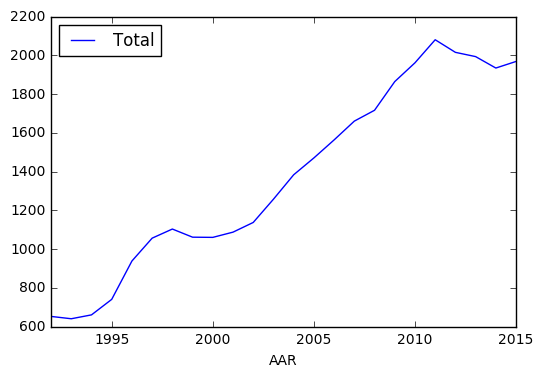

In [122]:
# Now just little bit visualizing of the data. Plot of the Icelandic people living in CPH through the years
Kbh_Stats_noDanes_nobydel[Kbh_Stats_noDanes_nobydel['STATKODE'] == 5106].plot(x = 'AAR', y = 'Total')
plt.show()

In [133]:
# We want to decode the country number and district number to there names
deCoder = pd.read_csv('../Data/Statcode_decoder.csv')
deCoderBydel = pd.read_csv('../Data/Bydel_decoder.csv')

#First decode the countries
for i in range(len(deCoder)):
    Kbh_Stats_noDanes.loc[(Kbh_Stats_noDanes['STATKODE'] == deCoder['STATKODE'][i]),('COUNTRY')] = deCoder['COUNTRY'][i]
    Kbh_Stats_noDanes_nobydel.loc[(Kbh_Stats_noDanes_nobydel['STATKODE'] == deCoder['STATKODE'][i]),('COUNTRY')] = deCoder['COUNTRY'][i]
    
# We know for the DataFrame KBH_Stats we have only Denmark and All other nation!
Kbh_Stats.loc[(Kbh_Stats['STATKODE'] == 5100),('COUNTRY')] = 'Danmark'
Kbh_Stats.loc[(Kbh_Stats['STATKODE'] == 0),('COUNTRY')] = 'Foreign Nations'
    
    
# second decode the districts
for i in range(len(deCoderBydel)):
    Kbh_Stats_noDanes.loc[(Kbh_Stats_noDanes['BYDEL'] == deCoderBydel['BYDELNR'][i]),('DISTRICT')] = deCoderBydel['BYDEL'][i]
    Kbh_Stats.loc[(Kbh_Stats['BYDEL'] == deCoderBydel['BYDELNR'][i]),('DISTRICT')] = deCoderBydel['BYDEL'][i]

**Theory. Which theoretical tools did you use?**



**Describe which machine learning tools you use and why the tools you've chosen are right for the problem you're solving.**

We used regression to be able to predict for the amount of each foreign country living in Copenhagen. The regression was based on the year and the percentage of each country. 


**Talk about your model selection. How did you split the data in to test/training. Did you use cross validation?**


**Explain the model performance. How did you measure it? Are your results what you expected?**

In [125]:
Data_Array = np.array([]).reshape(0,7)
TrainingData = Kbh_Stats_noDanes_nobydel[(Kbh_Stats_noDanes_nobydel['AAR'] <= 2011)]
TestData = Kbh_Stats_noDanes_nobydel[(Kbh_Stats_noDanes_nobydel['AAR'] > 2011)]
unqStatKode = TrainingData['STATKODE'].unique()

In [126]:
regPerc = linear_model.LinearRegression()
reg = linear_model.LinearRegression()
predictYear = np.array([2012,2013,2014,2015])
for val,i in enumerate(unqStatKode):
    regPerc.fit(TrainingData[TrainingData['STATKODE'] == i][['AAR','Percentage']],
                TrainingData[TrainingData['STATKODE'] == i][['Total']])
    
    PredPerc = regPerc.predict(TestData[TestData['STATKODE'] == i][['AAR','Percentage']])
    
    reg.fit(TrainingData[TrainingData['STATKODE'] == i][['AAR']],
            TrainingData[TrainingData['STATKODE'] == i][['Total']])
    
    Pred = reg.predict(TestData[TestData['STATKODE'] == i][['AAR']])
    
    Country = TrainingData[TrainingData['STATKODE'] == i]['COUNTRY'].unique()
    realData = TestData[TestData['STATKODE'] == i]['Total'].as_matrix()

    for j in range(len(predictYear)):
        Data_Array = np.append(Data_Array,
                               [[Country[0],predictYear[j],
                                 PredPerc[j][0],Pred[j][0],
                                 realData[j],PredPerc[j][0]-realData[j],Pred[j][0]-realData[j]]],axis = 0)

In [127]:
Predictions = pd.DataFrame(Data_Array, columns = ['COUNTRY', 'AAR', 'Predictions_Perc','Predictions','Real','Error_Perc','Error'])
Predictions['AAR'] = Predictions['AAR'].astype('float64')
Predictions['Predictions_Perc'] = Predictions['Predictions_Perc'].astype('float64')
Predictions['Predictions'] = Predictions['Predictions'].astype('float64')
Predictions['Real'] = Predictions['Real'].astype('float64')
Predictions['Error_Perc'] = Predictions['Error_Perc'].astype('float64')
Predictions['Error'] = Predictions['Error'].astype('float64')

#df['MyColumnName'] = df['MyColumnName'].astype('float64') 

In [128]:
TestData[TestData['COUNTRY'] == 'Island']

,AAR,STATKODE,Total,Percentage,COUNTRY
580,2012.0,5106.0,2015.0,0.026248,Island
387,2013.0,5106.0,1993.0,0.025167,Island
194,2014.0,5106.0,1934.0,0.023052,Island
1,2015.0,5106.0,1968.0,0.022445,Island


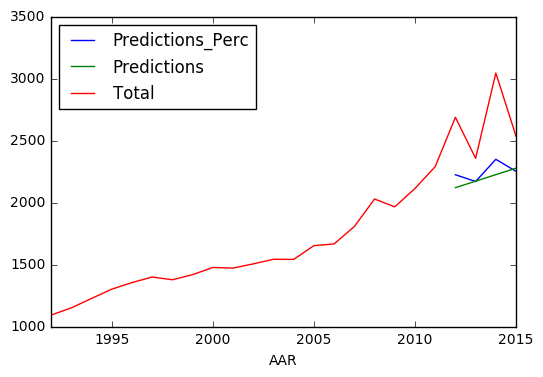

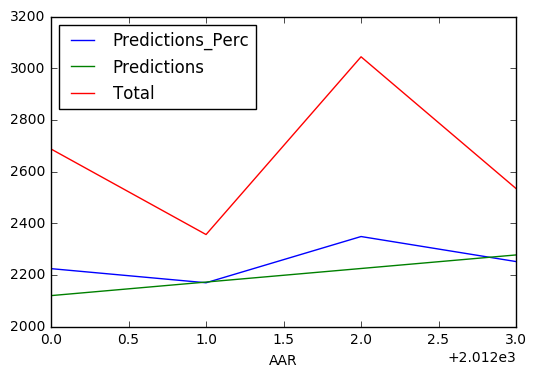

In [129]:
fig, ax = plt.subplots(1, 1)
country = 'USA'
Predictions[Predictions['COUNTRY'] == country].plot(x = 'AAR', y = 'Predictions_Perc', ax= ax)
Predictions[Predictions['COUNTRY'] == country].plot(x = 'AAR', y = 'Predictions', ax= ax)
Kbh_Stats_noDanes_nobydel[Kbh_Stats_noDanes_nobydel['COUNTRY'] == country].plot(x = 'AAR', y ='Total', ax = ax)
plt.show()

fig, ax = plt.subplots(1, 1)
Predictions[Predictions['COUNTRY'] == country].plot(x = 'AAR', y = 'Predictions_Perc', ax= ax)
Predictions[Predictions['COUNTRY'] == country].plot(x = 'AAR', y = 'Predictions', ax= ax)
TestData[TestData['COUNTRY'] == country].plot(x = 'AAR', y ='Total', ax = ax)
plt.show()

In [37]:
CountryUnq = Kbh_Stats_noDanes_nobydel['COUNTRY'].unique()
Years = Kbh_Stats_noDanes_nobydel['AAR'].unique()

In [38]:
Top25 = pd.DataFrame(columns = ['AAR','STATKODE','Total','Percentage','COUNTRY'])
for val,i in enumerate(Years):
    TopDataYear = Kbh_Stats_noDanes_nobydel[Kbh_Stats_noDanes_nobydel['AAR'] == i].nlargest(25,'Total')
    Top25 = Top25.append(TopDataYear)

In [134]:
# Creata a csv file of the Dataframe.
Kbh_Stats_noDanes_nobydel.to_csv('KBH_Stats_noDanes_noBydel_1.csv', sep=',', encoding='utf-8',index = False)
Kbh_Stats_noDanes.to_csv('KBH_Stats_noDanes.csv', sep=',', encoding='utf-8',index = False)
Kbh_Stats.to_csv('KBH_Stats.csv', sep=',', encoding='utf-8',index = False)
Predictions.to_csv('KBH_Stats_Predictions.csv', sep=',', encoding='utf-8',index = False)
Top25[['AAR','Total','COUNTRY']].to_csv('KBH_Top25_AllYears.csv', sep=',', encoding='utf-8',index = False)